# Introduction

- With the current news and commentary coming from all angles, it is hard to tell `where the information originates from`.
- We trust information that comes from people we can trust.
- In this project you will act as an `investigator`.
- The aim here is to determine who wrote a certain blog.
- We will start by narrowing down to a few individuals and then work out to identify who wrote it.
- For social media like twitter, bots are sometimes used.
- Authorship analysis is an area in text mining. We can also do `content analysis`, this is finding the author regardless of the content

# Steps

- Extract data from a corpus
- Detemine a method of determining authorship
- Build a machine learning model to learn authorship
- Scale up the model from a few authors to hundreds of potential authors
- Build a program so that non-programmers can use your model

# Tools

- BeautifulSoup -> XML extraction for poorly formed XML documents
- re: Regular Expressions in Python
- chardet - Determine the language of a piece of text
- spaCy - an industrial strength nlp tool
- scikit-learn - machine learning in python
- altair - visualization
- voila - turning a jupyter notebook into an app
- cProfile - knowing how long your script takes to run

# Workflow

- Download the dataset
- Examine the dataset - see the data
- Write a function that loads an XML file from the disk
- Load all the XML data into one big pandas dataframe
- Test that you can load the data in from a saved file and that the posts are not altered as you load them
- Work with a sample dataset and see all the posts from a certain author
- Extract samples of posts from authors with IDs
- Run a standard text mining pipleline to predict the author Id from the text, classifying only between the 10 authors.
- Extract n-grams from the documents as the features (not word2vec)
  * Classification on the resulting dataset
  * Evaluate the classification using F-Score/F1 score/F1 metric/F-beta score

# Preamble

- NLP - textblob, NLTK, textatistic, spaCy
- Tokenize text into words and sentences
- parts of speech tagging
- sentiment analysis - determining whether text is positive, negative or neutral
- Detect the language of text and translate between languages

What we will work on in this section:
  * word roots via stemming and lemmatization
  * spell checking and correction
  * definition, synonyms and antonyms
  * stop words from text
  * word cloud visualizations
  * Readability assessment
  * Named entry recognition and similarity detection

# Natural language communication

- Examples:
    - Conversations between people
    - Sign language
    - Learning a foreign language
    - Using a smartphone to translate signs written in a foreign language
    - Reading and writing text messages
    - Assistive technologies - Braille, screen reader
    - Receiving an email in French - using translator to understand and reply


# Corpus

- NLP is performed on text collections which are obtained from:
  - Tweets
  - Facebook posts
  - Conversations -> New York 911 call centre data
  - Movie reviews
  - Documents -> New York times dataset
  - Books -> Bible
  - News

- In NLP the most difficult job is understanding because of the fact that it is influenced by context and reader's world view

# TextBlob

- This is an object oriented NLP library built on NLTK and NLP pattern library
- Capabilities:
  - Tokenization - break text into pieces(tokens). The tokens are meaningful units like words, numbers etc.
  - Parts of Speech(POS) tagging - identifying each word -> nouns, verbs, adjectives
  - Noun phrase extraction - "Red brick factory" each of the words in the quotes is a noun and the combination is a phrase that can have several meanings. A factory that makes red bricks, music group, game, a factory that was built using red bricks
  - Sentiment analysis
  - Inter-language translation -> language detection(Google translate)
  - Spell-checking and correction
  - Inflection -> Trying to make words singular/plural
  - Stemming -> Reducing words to their stems by removing suffixes/prefixes e.g. varieties - varieti
  - Lemmatization -> Like stemming but produces real words based on the original word's context e.g. varieties - variety
  - Word frequency -> How often a certain word appears in a certain corpus
  - Integration with WordNet -> find synonyms and antonyms
  - Stop word elimination -> as, such, an, a, I, we
  - n-grams -> producing sets of consecutive words in a corpus for use in identifying words that frequently appear adjacent to each other

In [1]:
!ipython -m textblob.download_corpora

[TerminalIPythonApp] WARNING | GUI event loop or pylab initialization failed
]0;IPython: /content
UnknownBackendTraceback (most recent call last)
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.pyc in enable_matplotlib(self, gui)
   2953         # Now we must activate the gui pylab wants to use, and fix %run to take
   2954         # plot updates into account
-> 2955         self.enable_gui(gui)
   2956         self.magics_manager.registry['ExecutionMagics'].default_runner = \
   2957             pt.mpl_runner(self.safe_execfile)

/usr/local/lib/python2.7/dist-packages/IPython/terminal/interactiveshell.pyc in enable_gui(self, gui)
    512         if gui:
    513             self.active_eventloop, self._inputhook =\
--> 514                 get_inputhook_name_and_func(gui)
    515         else:
    516             self.active_eventloop = self._inputhook = None

/usr/local/lib/python2.7/dist-packages/IPython/terminal/pt_inputhooks/__init__.pyc in get_inputhook_name_

## Creating a TextBlob


In [2]:
from textblob import TextBlob

In [3]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [4]:
blob = TextBlob(text)

In [5]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

### Why TextBlob?
- It contains sentence(s), word(s) and TextBlob all inherit from BaseBlob which defines several methods
- Tokenizing text into sentences and words
- Getting the list of sentences in text

In [6]:
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

- wordlist is a subclass of the python built-in list type. It has additional NLP methods that can be used
- It contains TextBlob word objects

In [7]:
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

#### Parts of speech tagging
- Evaluates words based on context to determine parts of speech.
- This can help in getting the meaning
- We have 8 primary English parts of speech:
  - Nouns
  - Pronouns
  - Verbs
  - Adverbs
  - Adjectives
  - Prepositions
  - Conjunctions
  - Interjections
  - Words that express emotions like yes!, ha!
- Some words are tricky because they have more that 1 meaning e.g. `set` and `run`

In [8]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [9]:
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

- It has used PatternTagger to determine parts-of-speech which uses the pattern library
- It has 63 parts of speech tags
  - NN -> singular/mass nouns
  - VBZ -> Third person singular present verb
  - DT -> determiner (the, my, that, an, their)
  - JJ -> adjective
  - NNP -> proper singular noun
  - IN -> subordinating conjunction/preposition

In [10]:
  blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

## Sentiment analysis with TextBlob's default sentiment analyzer

- Polarity has values from -1(negative) to 1(positive). 0 is neutral
- Subjectivity has values from 0(objective) to 1(very subjective)

In [11]:
blob.sentiment

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

In [12]:
text2 = "I am asking you to go VOTE for your favorite president, we still have work to do! Let’s WIN, WIN, WIN!"

In [13]:
blob2 = TextBlob(text2)

In [14]:
blob2.sentiment

Sentiment(polarity=0.80625, subjectivity=0.5499999999999999)

In [15]:
text3 = "Over the next 4 years, we will teach our children to love our Country, honor our history, and always respect our great American Flag—and with God’s help, we will defend the right to life, religious liberty, and the right to KEEP AND BEAR ARMS!"

In [16]:
blob3 = TextBlob(text3)

In [17]:
blob3.sentiment

Sentiment(polarity=0.2775510204081633, subjectivity=0.38163265306122446)

### Getting polarity and subjectivity from the sentiment object

- %precision -> magic function that specifies the default precision for all standalone float objects.

In [18]:
%precision 3

'%.3f'

In [19]:
blob3.sentiment.polarity

0.278

In [20]:
blob3.sentiment.subjectivity

0.382

In [21]:
def kkr():
  a = 3.943879
  b = 7.78439
  c = (a * b)
  print(c)
  return c

In [22]:
kkr()

30.70069224881


30.701

In [23]:
  a = 3.943879
  b = 7.78439

In [24]:
(a, b)

(3.944, 7.784)

In [25]:
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [26]:
blob.sentiment

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

## Sentiment analysis using NaiveBayesAnalyzer

In [27]:
from textblob.sentiments import NaiveBayesAnalyzer

In [28]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())

In [29]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [30]:
blob.sentiment

Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)

In [31]:
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


In [32]:
text2

'I am asking you to go VOTE for your favorite president, we still have work to do! Let’s WIN, WIN, WIN!'

In [33]:
blob2 = TextBlob(text2, analyzer=NaiveBayesAnalyzer())

In [34]:
blob2.sentiment

Sentiment(classification='pos', p_pos=0.577578877801677, p_neg=0.422421122198322)

NaiveBayesAnalyzer has given the statement in text2 a lower positive rating of 0.5776 compared to 0.8063 given by the default sentiment analyzer

In [35]:
text3

'Over the next 4 years, we will teach our children to love our Country, honor our history, and always respect our great American Flag—and with God’s help, we will defend the right to life, religious liberty, and the right to KEEP AND BEAR ARMS!'

In [36]:
blob3 = TextBlob(text3, analyzer=NaiveBayesAnalyzer())

In [37]:
blob3.sentiment

Sentiment(classification='pos', p_pos=0.9986072761305599, p_neg=0.001392723869436325)

NaiveBayesAnalyzer has given the statement in text3 a very strong positive sentiment of 0.9986 compared to 0.2776 given by the default sentiment analyzer

## Language Detection and Translation

- Google and Bing translators can translate instantly -> near real time translation
- Using IBM Watson for inter-language translation

In [38]:
blob.detect_language()

'en'

In [39]:
luo_text = "Maria matakatifu Min Nyasaye kwanue wan"

In [40]:
luo_blob = TextBlob(luo_text)

In [41]:
luo_blob.detect_language()

'sw'

In [42]:
spanish = blob.translate(to='es')

In [43]:
spanish

TextBlob("Hoy es un hermoso dia. Mañana parece mal tiempo.")

In [44]:
chinese = blob.translate(to='zh')

In [45]:
chinese

TextBlob("今天是美好的一天。明天看起来天气不好。")

In [46]:
chinese.detect_language()

'zh-CN'

## Inflection: Pluralization and Singularization

- Inflections are different forms of the same words, such as plural and singular -> person and people, run and ran
- When doing word frequencies, you may want to convertt all the inflected words into the same form for more accurate representation



In [47]:
from textblob import Word

In [48]:
index = Word('index')

In [49]:
index

'index'

In [50]:
index.pluralize()

'indices'

In [51]:
cow = Word('cow')

In [52]:
cow.pluralize()

'kine'

In [53]:
person = Word('person')

In [54]:
person

'person'

In [55]:
person.pluralize()

'people'

In [56]:
people = Word('people')

In [57]:
people.singularize()

'person'

In [58]:
cows = Word('cows')

In [59]:
cows.singularize()

'cow'

In [60]:
cows = Word('kine')

In [61]:
cows.singularize()

'cow'

In [62]:
from textblob import TextBlob

In [63]:
animals = TextBlob('dog, cat, fish, bird are good pets')

In [64]:
animals.words.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds', 'ares', 'goods', 'petss'])

In [65]:
Word('are').pluralize()

'ares'

# Spell Checking and Correction

- The Words method has a spellcheck function that will return a list of possible correct spellings and confidence value for each

In [66]:
from textblob import Word

In [67]:
word = Word('theyr')

In [68]:
word.spellcheck()

[('they', 0.571), ('their', 0.429)]

In [69]:
word = Word("they'r")

In [70]:
word.spellcheck()

[('they', 0.571), ('their', 0.429)]

In [71]:
word.correct()

'they'

In [72]:
# use in a sentence
from textblob import TextBlob

In [73]:
sentence = TextBlob('This sentence has missplled wrds.')

In [74]:
sentence.correct()

TextBlob("His sentence has misspelled words.")

In [75]:
sentence = TextBlob('The govemrent is wokring on improvng the ongong situation regrding the curent pandemic')

In [76]:
sentence.correct()

TextBlob("The government is working on improving the longing situation regarding the current anaemic")

# Normalization: Stemming and Lemmatization

- Stemming removes the prefix and suffix. Whatever you're left with is the stem of the word. The word may not be a real word, it may lack meaning
- Lemmatization is similar to stemming but factors in parts of speech and meaning and therefore results in a word with meaning
- Stemming and Lemmatization normalize words for analysis:
  - Calculating statistics of words -> Number of occurences of a word
- We may want to use a word's root to represent the word's many forms:
  - program, programms to be treated as program

In [77]:
from textblob import Word

In [78]:
word = Word('varieties')

In [79]:
word.stem()

'varieti'

In [80]:
word.lemmatize()

'variety'

In [81]:
word = Word('boxes')

In [82]:
word.stem()

'box'

In [83]:
word.lemmatize()

'box'

# Word Frequencies

- Most techniques for detecting similarity between documents use word frequency.
- TextBlob can do that for you

In [84]:
import nltk

In [85]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
from pathlib import Path

In [87]:
from textblob import TextBlob

In [88]:
romeo = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [89]:
blob.word_counts['juliet']

0

In [90]:
blob.word_counts['romeo']

0

In [91]:
blob = TextBlob(Path('Bible.txt').read_text())

In [92]:
type(blob)

textblob.blob.TextBlob

In [93]:
blob.word_counts['God']

0

In [94]:
blob.word_counts['Christ']

0

In [95]:
blob.words.count('God')

4469

In [96]:
blob.words.count('Jesus')

983

### Getting definitions, antonyms and synonyms from the WordNet

- The WordNet is an English word DB created by Princeton University
- TextBlob uses NLTK WordNet interface to look for antonyms and synonyms

#### Synonyms

In [97]:
import nltk

In [98]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
from textblob import Word

In [100]:
happy = Word('happy')

In [101]:
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [102]:
happy.define()

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [103]:
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

 - synsets is a group of synonyms
 - happy is the original lemmatized form
 - a is the Part of Speech:
  - a - Adjective
  - n - Noun
  - v - Verb
  - r - Adverb
  - s - adjective satellite
- 01 is the index order of the corresponding meaning in the WordNet Database

In [104]:
synonyms = set()

In [105]:
for synset in happy.synsets:
  for lemma in synset.lemmas():
    synonyms.add(lemma.name())

In [106]:
synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

# Getting antonyms

- If the word represented by a lemma has antonyms in WordNet DB  invoking lemma's antonyms returns the list of lemmas representing the antonyms

In [107]:
lemmas = happy.synsets[0].lemmas()

In [108]:
lemmas

[Lemma('happy.a.01.happy')]

In [109]:
lemmas[0].antonyms()

[Lemma('unhappy.a.01.unhappy')]

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
from nltk.corpus import stopwords

In [112]:
stops = stopwords.words('english')

In [113]:
blob = TextBlob('Today is a beautiful day')

In [114]:
[word for word in blob.words if word not in stops]

['Today', 'beautiful', 'day']

In [115]:
shakespeare_words = [word for word in romeo.words if word not in stops]

### n-grams

- This is a sequence of n text items such as letters or words or words in a sentence
- Used to identify letters or words that appear adjacent to one another
  - It can also do predictive text input
  - Speech to text conversion

In [116]:
from textblob import TextBlob

In [117]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [118]:
text

'Today is a beautiful day. Tomorrow looks like bad weather.'

In [119]:
blob = TextBlob(text)

- The n-grams method produces a list of wordlist n-grams of length 3 by default(trigrams)
- If you wanted to change it just assign n to a value i.e n=4

In [120]:
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'Tomorrow']),
 WordList(['day', 'Tomorrow', 'looks']),
 WordList(['Tomorrow', 'looks', 'like']),
 WordList(['looks', 'like', 'bad']),
 WordList(['like', 'bad', 'weather'])]

In [121]:
blob.ngrams(n=2)

[WordList(['Today', 'is']),
 WordList(['is', 'a']),
 WordList(['a', 'beautiful']),
 WordList(['beautiful', 'day']),
 WordList(['day', 'Tomorrow']),
 WordList(['Tomorrow', 'looks']),
 WordList(['looks', 'like']),
 WordList(['like', 'bad']),
 WordList(['bad', 'weather'])]

# Visualizing Word Frequencies using Bar charts and Word clouds

- Bar chart can help you visualize the data quantitatively - top 20 words
- Word cloud can help you visualize frequently occuring words. Frequently occuring words are shown in large font. Words appearing less frequently are shown in smaller font

In [122]:
# import ipython

In [123]:
# ipython --matplotlib

In [124]:
import matplotlib.pyplot as plt

In [125]:
from pathlib import Path

In [126]:
from textblob import TextBlob

In [127]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [128]:
# stop words
from nltk.corpus import stopwords

In [129]:
stop_words = stopwords.words('english')

In [130]:
# Get the word frequency tuples
items = blob.word_counts.items()

In [131]:
items

dict_items([('the', 679), ('tragedy', 1), ('of', 401), ('romeo', 156), ('and', 713), ('juliet', 66), ('by', 109), ('william', 1), ('shakespeare', 1), ('dramatis', 1), ('personae', 1), ('chorus', 3), ('escalus', 2), ('prince', 42), ('verona', 18), ('paris', 36), ('a', 468), ('young', 24), ('count', 5), ('kinsman', 14), ('to', 541), ('montague', 33), ('heads', 7), ('two', 25), ('houses', 7), ('at', 70), ('variance', 2), ('with', 255), ('each', 4), ('other', 20), ('capulet', 44), ('an', 86), ('old', 33), ('man', 77), ('family', 1), ('son', 18), ('tybalt', 65), ('nephew', 4), ('lady', 77), ('mercutio', 26), ('friend', 16), ('benvolio', 17), ('friar', 93), ('laurence', 22), ('franciscan', 3), ('john', 9), ('balthasar', 7), ('servant', 7), ('abram', 2), ('sampson', 4), ('gregory', 5), ('peter', 20), ('s', 289), ('nurse', 150), ('apothecary', 5), ('three', 10), ('musicians', 9), ('officer', 3), ('wife', 47), ('daughter', 17), ('citizens', 6), ('gentlemen', 11), ('gentlewomen', 2), ('both', 23

In [132]:
# Eliminate the stopwords
items = [item for item in items if item[0] not in stop_words]

In [133]:
items

[('tragedy', 1),
 ('romeo', 156),
 ('juliet', 66),
 ('william', 1),
 ('shakespeare', 1),
 ('dramatis', 1),
 ('personae', 1),
 ('chorus', 3),
 ('escalus', 2),
 ('prince', 42),
 ('verona', 18),
 ('paris', 36),
 ('young', 24),
 ('count', 5),
 ('kinsman', 14),
 ('montague', 33),
 ('heads', 7),
 ('two', 25),
 ('houses', 7),
 ('variance', 2),
 ('capulet', 44),
 ('old', 33),
 ('man', 77),
 ('family', 1),
 ('son', 18),
 ('tybalt', 65),
 ('nephew', 4),
 ('lady', 77),
 ('mercutio', 26),
 ('friend', 16),
 ('benvolio', 17),
 ('friar', 93),
 ('laurence', 22),
 ('franciscan', 3),
 ('john', 9),
 ('balthasar', 7),
 ('servant', 7),
 ('abram', 2),
 ('sampson', 4),
 ('gregory', 5),
 ('peter', 20),
 ('nurse', 150),
 ('apothecary', 5),
 ('three', 10),
 ('musicians', 9),
 ('officer', 3),
 ('wife', 47),
 ('daughter', 17),
 ('citizens', 6),
 ('gentlemen', 11),
 ('gentlewomen', 2),
 ('maskers', 5),
 ('torchbearers', 2),
 ('pages', 1),
 ('guards', 1),
 ('watchmen', 1),
 ('servants', 3),
 ('attendants', 2),
 ('s

- Sort the words by frequency
- Specify the tuple element to sort by using the itemgetter function

In [134]:
from operator import itemgetter

In [135]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [136]:
sorted_items

[('thou', 278),
 ('thy', 164),
 ('rom', 163),
 ('romeo', 156),
 ('nurse', 150),
 ('love', 148),
 ('thee', 138),
 ('jul', 117),
 ('shall', 110),
 ('come', 98),
 ('friar', 93),
 ('enter', 82),
 ('good', 82),
 ('man', 77),
 ('lady', 77),
 ('go', 76),
 ('night', 73),
 ('death', 72),
 ('juliet', 66),
 ('tybalt', 65),
 ('ben', 64),
 ('hath', 64),
 ('one', 62),
 ('mer', 62),
 ('well', 59),
 ('sir', 56),
 ('would', 56),
 ('art', 55),
 ('cap', 53),
 ('say', 52),
 ('let', 51),
 ('dead', 49),
 ('day', 48),
 ('wife', 47),
 ('doth', 47),
 ('give', 47),
 ('may', 47),
 ('yet', 47),
 ('tell', 45),
 ('capulet', 44),
 ('fair', 44),
 ('upon', 44),
 ('prince', 42),
 ('take', 41),
 ('must', 40),
 ('make', 40),
 ('like', 40),
 ('see', 37),
 ('much', 37),
 ('paris', 36),
 ('know', 35),
 ('montague', 33),
 ('old', 33),
 ('exit', 33),
 ('look', 33),
 ('exeunt', 33),
 ('sweet', 33),
 ('heart', 33),
 ('gone', 33),
 ('time', 32),
 ('god', 32),
 ('ay', 31),
 ('stay', 31),
 ('lord', 31),
 ('us', 30),
 ('wilt', 30),

- We plot the first 20 words
- TextBlob tokenizes contractions - counts the total number of apostrophes and assigns a value

In [137]:
top20 = sorted_items[1:21]

In [138]:
top20

[('thy', 164),
 ('rom', 163),
 ('romeo', 156),
 ('nurse', 150),
 ('love', 148),
 ('thee', 138),
 ('jul', 117),
 ('shall', 110),
 ('come', 98),
 ('friar', 93),
 ('enter', 82),
 ('good', 82),
 ('man', 77),
 ('lady', 77),
 ('go', 76),
 ('night', 73),
 ('death', 72),
 ('juliet', 66),
 ('tybalt', 65),
 ('ben', 64)]

In [139]:
import pandas as pd

In [140]:
df = pd.DataFrame(top20, columns=['word', 'count'])

In [141]:
df

,word,count
0,thy,164
1,rom,163
2,romeo,156
3,nurse,150
4,love,148
5,thee,138
6,jul,117
7,shall,110
8,come,98
9,friar,93


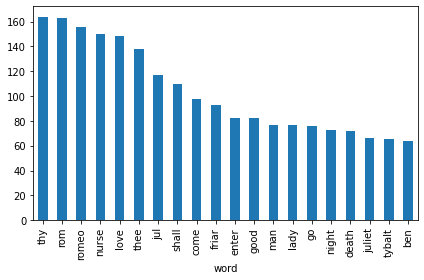

In [142]:
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

### Word clouds

- uses the worldcloud module

In [143]:
!pip install wordcloud

In [144]:
from pathlib import Path

In [145]:
text = TextBlob(Path('RomeoAndJuliet.txt').read_text())

- Load the mast image that specifies the word cloud's shape
- The wordCloud fills the non-white areas of the mask with text
- Load the mask using imread function from imageio in anaconda

In [146]:
import imageio

In [147]:
mask_image = imageio.imread('mask_heart.png')

#### Configuring the mask image to specify the word cloud shape
- We have 400 by 200 pixels that can only be affected if we specify the height and width
- We can have random colors assigned by color map

In [148]:
from wordcloud import WordCloud

In [149]:
wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')

- The WordCloud generate method receives text to use in the wordcloud as an argument

In [150]:
text.words

WordList(['THE', 'TRAGEDY', 'OF', 'ROMEO', 'AND', 'JULIET', 'by', 'William', 'Shakespeare', 'Dramatis', 'Personae', 'Chorus', 'Escalus', 'Prince', 'of', 'Verona', 'Paris', 'a', 'young', 'Count', 'kinsman', 'to', 'the', 'Prince', 'Montague', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'Capulet', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'An', 'old', 'Man', 'of', 'the', 'Capulet', 'family', 'Romeo', 'son', 'to', 'Montague', 'Tybalt', 'nephew', 'to', 'Lady', 'Capulet', 'Mercutio', 'kinsman', 'to', 'the', 'Prince', 'and', 'friend', 'to', 'Romeo', 'Benvolio', 'nephew', 'to', 'Montague', 'and', 'friend', 'to', 'Romeo', 'Tybalt', 'nephew', 'to', 'Lady', 'Capulet', 'Friar', 'Laurence', 'Franciscan', 'Friar', 'John', 'Franciscan', 'Balthasar', 'servant', 'to', 'Romeo', 'Abram', 'servant', 'to', 'Montague', 'Sampson', 'servant', 'to', 'Capulet', 'Gregory', 'servant', 'to', 'Capulet', 'Peter', 'servant', 'to', 'Juliet', "'s", 'nurse'

In [151]:
wordcloud = wordcloud.generate(Path('RomeoAndJuliet.txt').read_text())

- It removes the stop words from the text argument using the wordcloud
- It then calculates the frequency of the remaining words
- It then builds a cloud using the maximum 200 words by default. You can change the maximum number of words using the max_words argument

In [152]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

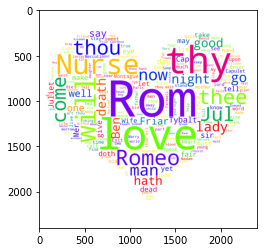

In [153]:
plt.imshow(wordcloud)

In [154]:
!pip install voila

In [155]:
!pip install voila-gridstack

     |████████████████████████████████| 143kB 5.8MB/s 


In [156]:
!pip install bqplot

     |████████████████████████████████| 983kB 5.9MB/s 


Document continued [here](https://colab.research.google.com/drive/1BpAniCodkXe5PE0tfsl-XP_POMi35E3C) for sanity and length of document